Repository with full code: https://github.com/rasbt/python-machine-learning-book-2nd-edition

In [86]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [87]:
class Perceptron(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #calculating delta
                delta = self.eta * (target - self.predict(xi))
                #updating weights
                self.w_[1:] += delta * xi
                self.w_[0] += delta
                #adding number of wrongly classified observations
                errors += int(delta != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        #calculating total impulse
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        #clasification
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [88]:
df = pd.read_csv('iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


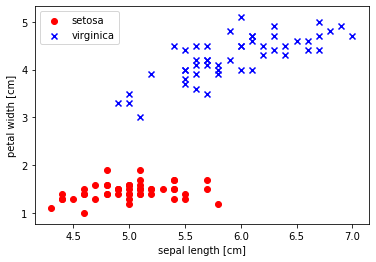

In [89]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

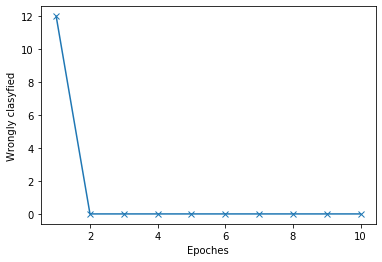

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X_train, y_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='x')
plt.xlabel('Epoches')
plt.ylabel('Wrongly clasyfied')

plt.show()

In [91]:
y_pred = ppn.predict(X_test)
accuracy_score(y_test, y_pred)

1.0